In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
from sklearn import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

2021-08-19 00:12:48.396232: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-19 00:12:48.396286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
sq_aroon_df = pd.read_csv(Path('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Daily Strategies/SQ 1D AROON 25 TRADE STRATEGY.csv'), index_col = 'Date', infer_datetime_format= True)
sq_aroon_df
aroon_sub_df = sq_aroon_df[['Close', 'aroon_signal',]]
aroon_sub_df

In [3]:
sq_macd_df = pd.read_csv(Path('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Daily Strategies/SQ 1D MACD TRADE STRATEGY.csv'), infer_datetime_format = True, index_col = 'Date')
sq_macd_df
macd_sub_df = sq_macd_df[['macd_signal']]
macd_sub_df

macd_signal
Date                   
2019-09-03            0
2019-09-04            1
2019-09-05            0
2019-09-06            0
2019-09-09            0
...                 ...
2021-08-04            0
2021-08-05            0
2021-08-06            0
2021-08-09            0
2021-08-10            0

[489 rows x 1 columns]

In [4]:
sq_rsi_df = pd.read_csv(Path('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Daily Strategies/SQ 1D RSI TRADE STRATEGY.csv'), infer_datetime_format= True, index_col= 'Date')
sq_rsi_df

rsi_sub_df = sq_rsi_df[['rsi_signal']]
rsi_sub_df

rsi_signal
Date                  
2019-09-03           0
2019-09-04           0
2019-09-05           0
2019-09-06           0
2019-09-09           0
...                ...
2021-08-04           0
2021-08-05           0
2021-08-06           0
2021-08-09           0
2021-08-10           0

[489 rows x 1 columns]

In [5]:
sq_ao_df = pd.read_csv(Path('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Daily Strategies/SQ 1D AO TRADE STRATEGY.csv'), infer_datetime_format= True, index_col = 'Date')

ao_sub_df = sq_ao_df[['ao_signal']]
ao_sub_df

ao_signal
Date                 
2019-10-21          0
2019-10-22          0
2019-10-23          0
2019-10-24         -1
2019-10-25          0
...               ...
2021-08-04          0
2021-08-05          0
2021-08-06          0
2021-08-09          0
2021-08-10          0

[455 rows x 1 columns]

In [6]:
sq_bollinger_df = pd.read_csv(Path('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Daily Strategies/SQ 1D BOLLINGER BANDS TRADE STRATEGY.CSV'), infer_datetime_format= True, index_col= 'Date')

bollinger_sub_df = sq_bollinger_df[['bollinger_signal']]
bollinger_sub_df

bollinger_signal
Date                        
2019-09-03               0.0
2019-09-04               0.0
2019-09-05               0.0
2019-09-06               0.0
2019-09-09               0.0
...                      ...
2021-08-04              -1.0
2021-08-05              -1.0
2021-08-06              -1.0
2021-08-09              -1.0
2021-08-10               0.0

[489 rows x 1 columns]

In [7]:
combined_signals_df = pd.concat([aroon_sub_df, macd_sub_df, rsi_sub_df, ao_sub_df, bollinger_sub_df], axis = 1).fillna(0)
combined_signals_df

Close  aroon_signal  macd_signal  rsi_signal  ao_signal  \
Date                                                                       
2019-09-03   61.130001             0            0           0        0.0   
2019-09-04   61.169998             0            1           0        0.0   
2019-09-05   63.020000             0            0           0        0.0   
2019-09-06   62.000000             0            0           0        0.0   
2019-09-09   61.470001             0            0           0        0.0   
...                ...           ...          ...         ...        ...   
2021-08-04  266.420013             0            0           0        0.0   
2021-08-05  281.809998             0            0           0        0.0   
2021-08-06  275.100006             0            0           0        0.0   
2021-08-09  279.730011             0            0           0        0.0   
2021-08-10  273.079987             0            0           0        0.0   

            bollinger_signal  
Date                          
2019-09-03               0.0  
2019-09-04               0.0  
2019-09-05               0.0  
2019-09-06               0.0  
2019-09-09               0.0  
...                      ...  
2021-08-04              -1.0  
2021-08-05              -1.0  
2021-08-06              -1.0  
2021-08-09              -1.0  
2021-08-10               0.0  

[489 rows x 6 columns]

In [8]:
combined_signals_df.to_csv('SQ DAILY ALL EXTRA SIGNALS.csv')

In [9]:
# combined_signals_df.drop(columns = ['trend_aroon_up', 'trend_aroon_down', 'aroon_position', 'macd', 'signal', 'macd_position', 'RSI', 'rsi_position'], inplace = True)
combined_signals_df['Returns'] = combined_signals_df.Close.pct_change()
combined_signals_df

Close  aroon_signal  macd_signal  rsi_signal  ao_signal  \
Date                                                                       
2019-09-03   61.130001             0            0           0        0.0   
2019-09-04   61.169998             0            1           0        0.0   
2019-09-05   63.020000             0            0           0        0.0   
2019-09-06   62.000000             0            0           0        0.0   
2019-09-09   61.470001             0            0           0        0.0   
...                ...           ...          ...         ...        ...   
2021-08-04  266.420013             0            0           0        0.0   
2021-08-05  281.809998             0            0           0        0.0   
2021-08-06  275.100006             0            0           0        0.0   
2021-08-09  279.730011             0            0           0        0.0   
2021-08-10  273.079987             0            0           0        0.0   

            bollinger_signal   Returns  
Date                                    
2019-09-03               0.0       NaN  
2019-09-04               0.0  0.000654  
2019-09-05               0.0  0.030244  
2019-09-06               0.0 -0.016185  
2019-09-09               0.0 -0.008548  
...                      ...       ...  
2021-08-04              -1.0 -0.011392  
2021-08-05              -1.0  0.057766  
2021-08-06              -1.0 -0.023810  
2021-08-09              -1.0  0.016830  
2021-08-10               0.0 -0.023773  

[489 rows x 7 columns]

In [10]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
combined_signals_df['Binary Return'] = np.where(combined_signals_df['Returns'] > 0.0, 1.0, 0.0)

In [11]:
# Shift DataFrame values by 1
combined_signals_df[['aroon_signal','macd_signal','rsi_signal', 'ao_signal', 'bollinger_signal']] = combined_signals_df[['aroon_signal','macd_signal','rsi_signal', 'ao_signal', 'bollinger_signal']].shift(1)
combined_signals_df[['aroon_signal','macd_signal','rsi_signal', 'ao_signal', 'bollinger_signal']].head()

aroon_signal  macd_signal  rsi_signal  ao_signal  bollinger_signal
Date                                                                          
2019-09-03           NaN          NaN         NaN        NaN               NaN
2019-09-04           0.0          0.0         0.0        0.0               0.0
2019-09-05           0.0          1.0         0.0        0.0               0.0
2019-09-06           0.0          0.0         0.0        0.0               0.0
2019-09-09           0.0          0.0         0.0        0.0               0.0

In [12]:
# Drop NAs and replace positive/negative infinity values
combined_signals_df.dropna(inplace=True)
combined_signals_df = combined_signals_df.replace([np.inf, -np.inf], np.nan)
combined_signals_df.head()

Close  aroon_signal  macd_signal  rsi_signal  ao_signal  \
Date                                                                      
2019-09-04  61.169998           0.0          0.0         0.0        0.0   
2019-09-05  63.020000           0.0          1.0         0.0        0.0   
2019-09-06  62.000000           0.0          0.0         0.0        0.0   
2019-09-09  61.470001           0.0          0.0         0.0        0.0   
2019-09-10  60.549999           0.0          0.0         0.0        0.0   

            bollinger_signal   Returns  Binary Return  
Date                                                   
2019-09-04               0.0  0.000654            1.0  
2019-09-05               0.0  0.030244            1.0  
2019-09-06               0.0 -0.016185            0.0  
2019-09-09               0.0 -0.008548            0.0  
2019-09-10               0.0 -0.014967            0.0

In [13]:
# Construct training start and end dates
training_start = combined_signals_df.index.min()[:10]
training_end = '2019-12-10'

# Construct testing start and end dates
testing_start =  '2019-12-11'
testing_end = combined_signals_df.index.max()[:10]

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-09-04
Training End: 2019-12-10
Testing Start: 2019-12-11
Testing End: 2021-08-10


In [14]:
# Construct the X_train and y_train datasets
X_train = combined_signals_df[['aroon_signal','macd_signal','rsi_signal', 'ao_signal', 'bollinger_signal']][training_start:training_end]
y_train = combined_signals_df['Binary Return'][training_start:training_end]

X_train.tail()

aroon_signal  macd_signal  rsi_signal  ao_signal  bollinger_signal
Date                                                                          
2019-12-04           0.0          0.0         0.0        0.0               0.0
2019-12-05           0.0          0.0         0.0        0.0               0.0
2019-12-06           0.0         -1.0         0.0        0.0               0.0
2019-12-09           0.0          0.0         0.0        0.0               0.0
2019-12-10           0.0          0.0         0.0        0.0               0.0

In [15]:
# Construct the X test and y test datasets
X_test = combined_signals_df[['aroon_signal','macd_signal','rsi_signal', 'ao_signal', 'bollinger_signal']][testing_start:testing_end]
y_test = combined_signals_df['Binary Return'][testing_start:testing_end]

X_test.tail()

aroon_signal  macd_signal  rsi_signal  ao_signal  bollinger_signal
Date                                                                          
2021-08-04           0.0          0.0         0.0        0.0              -1.0
2021-08-05           0.0          0.0         0.0        0.0              -1.0
2021-08-06           0.0          0.0         0.0        0.0              -1.0
2021-08-09           0.0          0.0         0.0        0.0              -1.0
2021-08-10           0.0          0.0         0.0        0.0              -1.0

In [16]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

Binary Return  Predicted Value
Date                                      
2019-12-11            0.0              1.0
2019-12-12            1.0              1.0
2019-12-13            0.0              1.0
2019-12-16            1.0              1.0
2019-12-17            0.0              1.0
...                   ...              ...
2021-08-04            0.0              1.0
2021-08-05            1.0              1.0
2021-08-06            0.0              1.0
2021-08-09            1.0              1.0
2021-08-10            0.0              1.0

[419 rows x 2 columns]

In [17]:
predictions = model.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [18]:
# Add predicted results to DataFrame
Results["Predicted Value"] = predictions
Results

Binary Return  Predicted Value
Date                                      
2019-12-11            0.0              1.0
2019-12-12            1.0              1.0
2019-12-13            0.0              1.0
2019-12-16            1.0              1.0
2019-12-17            0.0              1.0
...                   ...              ...
2021-08-04            0.0              1.0
2021-08-05            1.0              1.0
2021-08-06            0.0              1.0
2021-08-09            1.0              1.0
2021-08-10            0.0              1.0

[419 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

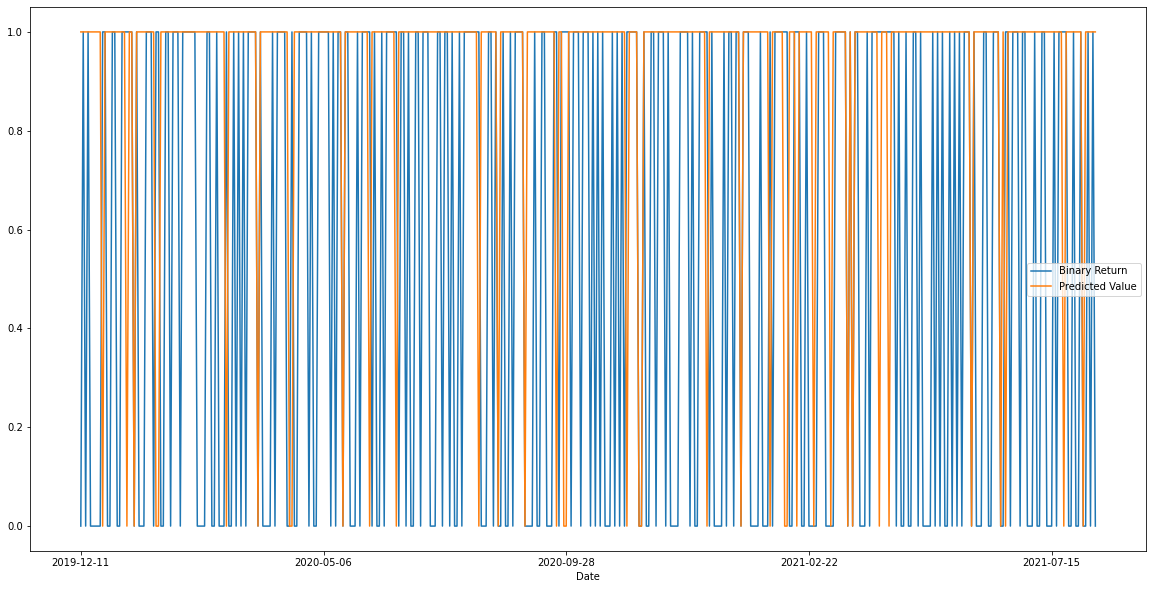

In [19]:
# Plot predicted results vs. actual results
Results[['Binary Return', 'Predicted Value']].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

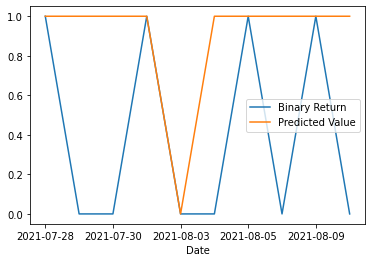

In [20]:
# Plot last 10 records of predicted vs. actual results
Results[['Binary Return', 'Predicted Value']].tail(10).plot()

In [21]:
# Replace predicted values 0 to -1 to account for shorting
Results['Predicted Value'].replace(0, -1, inplace=True)
Results

Binary Return  Predicted Value
Date                                      
2019-12-11            0.0              1.0
2019-12-12            1.0              1.0
2019-12-13            0.0              1.0
2019-12-16            1.0              1.0
2019-12-17            0.0              1.0
...                   ...              ...
2021-08-04            0.0              1.0
2021-08-05            1.0              1.0
2021-08-06            0.0              1.0
2021-08-09            1.0              1.0
2021-08-10            0.0              1.0

[419 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

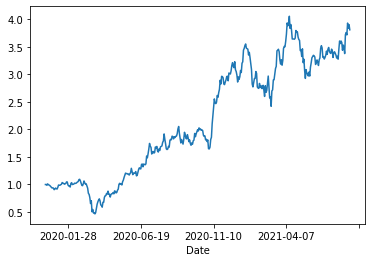

In [22]:
# Calculate cumulative return of model and plot the result
(1 + (combined_signals_df['Returns'] * Results['Predicted Value'])).cumprod().plot()

In [23]:
# df = pd.read_csv('/work/Fintech-Project2/STRATEGY NOTEBOOKS/SQ ALL SIGNALS.csv')
initial_capital = 100000

initial_buy_amt = initial_capital / aroon_sub_df['Close'].iloc[0]

hold_value = initial_buy_amt * aroon_sub_df['Close'].iloc[-1]

buy_hold_profit = (hold_value - initial_capital)/(initial_capital)*100
buy_hold_profit

346.72007492357346

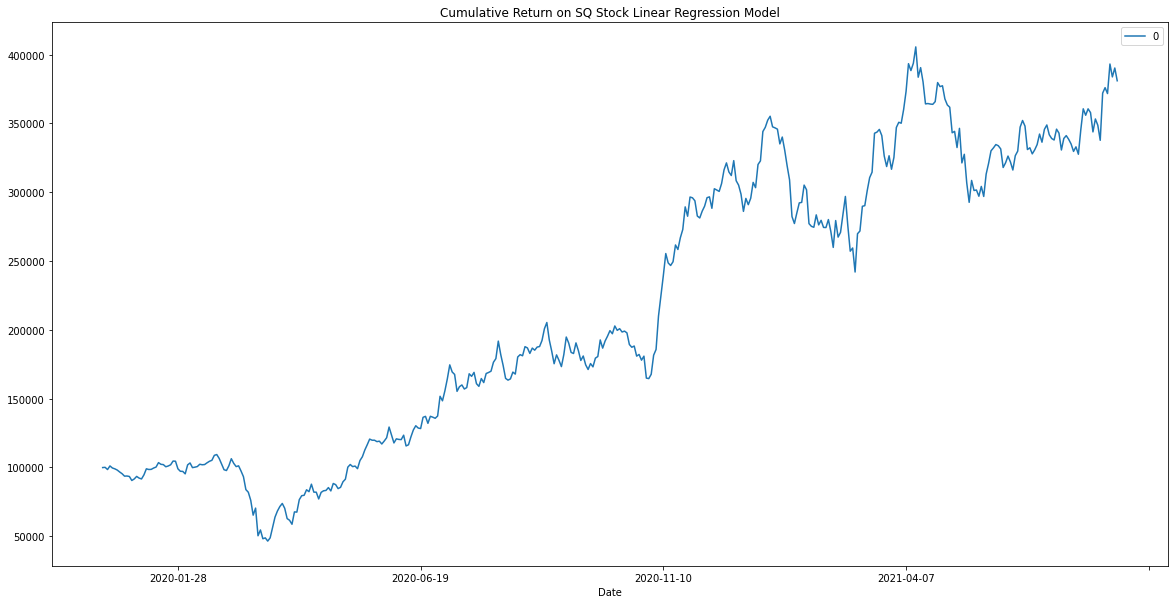

In [24]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (combined_signals_df['Returns'] * Results['Predicted Value'])).cumprod().to_frame()
returns_plot = cumulative_return_capital.plot(figsize = (20,10), title = 'Cumulative Return on SQ Stock Linear Regression Model')
cumulative_return_capital.to_csv('Daily Strategy cumulative return on sq.csv')

In [25]:
cumulative_return_capital.tail()

0
Date                     
2021-08-04  371761.076906
2021-08-05  393236.179322
2021-08-06  383873.092754
2021-08-09  390333.777066
2021-08-10  381054.368189

In [26]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [27]:
# Splitting into Train and Test sets
acc_score

0.5274463007159904

In [28]:
# df_for_GB = combined_signals_df.drop(columns = ['Close', 'Returns'])
# df_for_GB.to_csv('SQ Signals and Binary Return for TrainTest.csv')

In [29]:
cumulative_profit = (cumulative_return_capital.iloc[-2] - initial_capital)/(initial_capital)*100
cumulative_profit

0    290.333777
Name: 2021-08-09, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>